# T6 - Using analyzers

Analyzers are objects that do not change the behavior of a simulation, but just report on its internal state, almost always something to do with `sim.people`. This tutorial takes you through some of the built-in analyzers and gives a brief example of how to build your own.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/institutefordiseasemodeling/hpvsim/HEAD?urlpath=lab%2Ftree%2Fdocs%2Ftutorials%2Ftut_analyzers.ipynb) to open an interactive version of this notebook.
    
</div>



## Results by age

By far the most common reason to use an analyzer is to report results by age. The results in `sim.results` already include results disaggregated by age, e.g. `sim.results['cancers_by_age']`, but these results use standardized age bins which may not match the age bins for available data on cervical cancers. Age-specific outputs can be customized using an analyzer to match the age bins of the data. The following example shows how to set this up:

HPVsim 1.2.0 (2023-05-31) — © 2023 by IDM
HPVsim data: at least one file missing: {'metadata': False, 'age_dist': False, 'birth': False, 'death': False, 'life_expectancy': False}


————————————————————————————————————
————————————————————————————————————

Note: this automatic download only happens once, when HPVsim is first run.


Saving to /Users/luojunyang/Library/CloudStorage/OneDrive-Bill&MelindaGatesFoundation/Documents/GitHub/hpvsim/docs/tutorials/files/tmp_hpvsim_data_v1.1.zip.zip...
Time to download https://github.com/amath-idm/hpvsim_data/blob/main/hpvsim_data_v1.1.zip?raw=true: 6.43 s
Time to download 1 URLs: 6.43 s
Removed "/Users/luojunyang/Library/CloudStorage/OneDrive-Bill&MelindaGatesFoundation/Documents/GitHub/hpvsim/docs/tutorials/files/tmp_hpvsim_data_v1.1.zip.zip"

Data downloaded.
Loading location-specific demographic data for "tanzania"
Initializing sim with 50000 agents
Loading location-specific data for "tanzania"
  Running 1970.0 ( 0/51) (1.88 s)  ——————————————

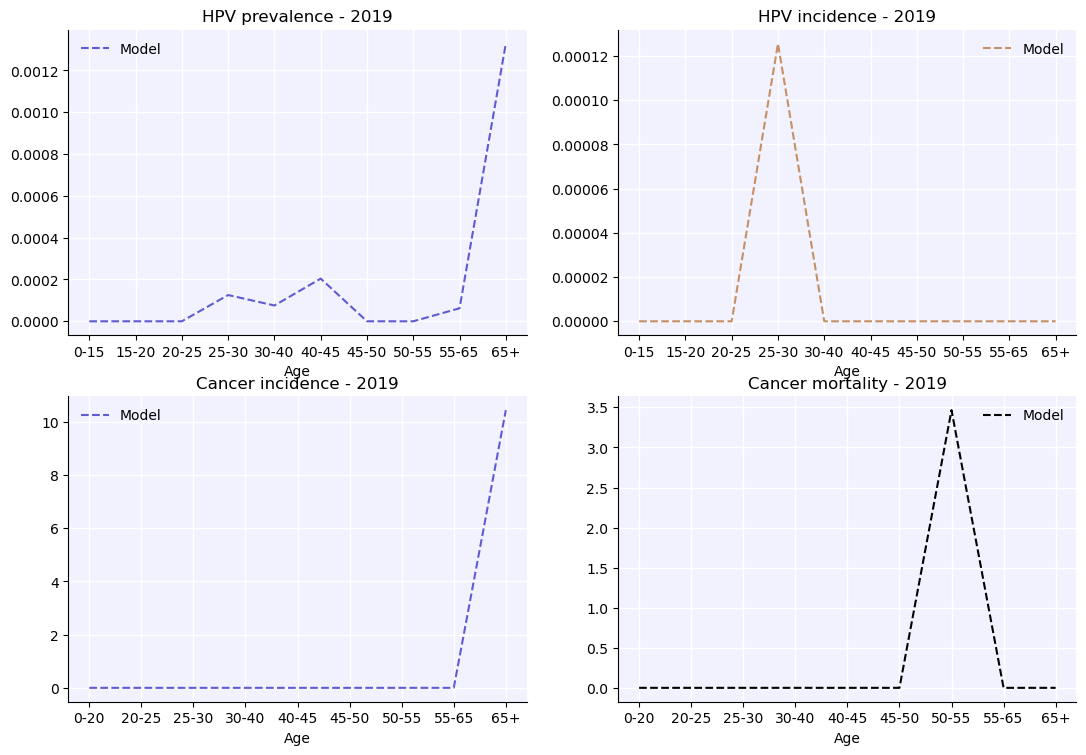

In [1]:
import numpy as np
import sciris as sc
import hpvsim as hpv

# Create some parameters, setting beta (per-contact transmission probability) higher
# to create more cancers for illutration
pars = dict(beta=0.5, n_agents=50e3, start=1970, n_years=50, dt=1., location='tanzania')

# Also set initial HPV prevalence to be high, again to generate more cancers
pars['init_hpv_prev'] = {
    'age_brackets'  : np.array([  12,   17,   24,   34,  44,   64,    80, 150]),
    'm'             : np.array([ 0.0, 0.75, 0.9, 0.45, 0.1, 0.05, 0.005, 0]),
    'f'             : np.array([ 0.0, 0.75, 0.9, 0.45, 0.1, 0.05, 0.005, 0]),
}

# Create the age analyzers.
az1 = hpv.age_results(
    result_args=sc.objdict(
        hpv_prevalence=sc.objdict( # The keys of this dictionary are any results you want by age, and can be any key of sim.results
            years=2019, # List the years that you want to generate results for
            edges=np.array([0., 15., 20., 25., 30., 40., 45., 50., 55., 65., 100.]),
        ),
        hpv_incidence=sc.objdict(
            years=2019,
            edges=np.array([0., 15., 20., 25., 30., 40., 45., 50., 55., 65., 100.]),
        ),
        cancer_incidence=sc.objdict(
            years=2019,
            edges=np.array([0.,20.,25.,30.,40.,45.,50.,55.,65.,100.]),
        ),
        cancer_mortality=sc.objdict(
            years=2019,
            edges=np.array([0., 20., 25., 30., 40., 45., 50., 55., 65., 100.]),
        )
    )
)

sim = hpv.Sim(pars, genotypes=[16, 18], analyzers=[az1])
sim.run()
a = sim.get_analyzer()
a.plot();

It's also possible to plot these results alongside data.

Loading location-specific demographic data for "tanzania"
Initializing sim with 50000 agents
Loading location-specific data for "tanzania"
  Running 1970.0 ( 0/51) (1.35 s)  ———————————————————— 2%
  Running 1980.0 (10/51) (4.99 s)  ••••———————————————— 22%
  Running 1990.0 (20/51) (10.84 s)  ••••••••———————————— 41%
  Running 2000.0 (30/51) (22.36 s)  ••••••••••••———————— 61%
  Running 2010.0 (40/51) (41.35 s)  ••••••••••••••••———— 80%
  Running 2020.0 (50/51) (70.27 s)  •••••••••••••••••••• 100%

Simulation summary:
          268 infections
            0 dysplasias
            0 pre-cins
          268 cin1s
        2,463 cin2s
          884 cin3s
        5,542 cins
           27 cancers
            0 cancer detections
          134 cancer deaths
            0 detected cancer deaths
          268 reinfections
            0 reactivations
   121,549,672 number susceptible
        4,123 number infectious
          402 number with inactive infection
   60,773,168 number with no cellular c

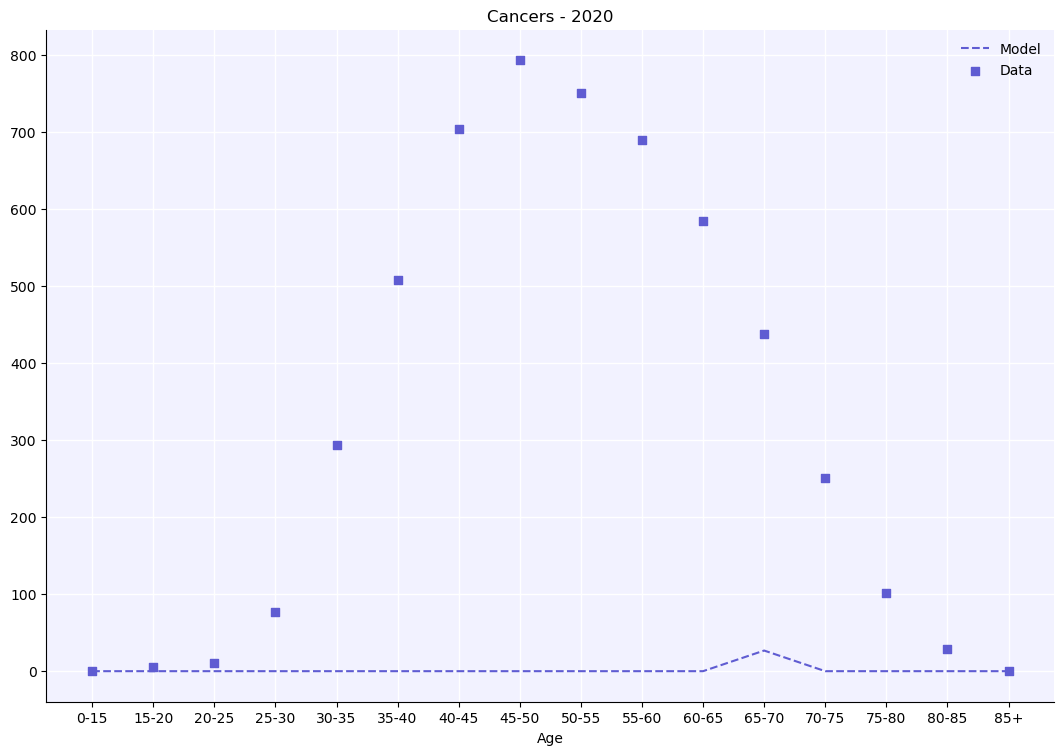

In [2]:
az2 = hpv.age_results(
    result_args=sc.objdict(
        cancers=sc.objdict(
            datafile='example_cancer_cases.csv',
        ),
    )
)
sim = hpv.Sim(pars, genotypes=[16, 18], analyzers=[az2])
sim.run()
a = sim.get_analyzer()
a.plot();

These results are not particularly well matched to the data, but we will deal with this in the calibration tutorial later.

## Snapshots

Snapshots both take "pictures" of the `sim.people` object at specified points in time. This is because while most of the information from `sim.people` is retrievable at the end of the sim from the stored events, it's much easier to see what's going on at the time. The following example leverages a snapshot in order to create a figure demonstrating age mixing patterns among sexual contacts:

Loading location-specific demographic data for "nigeria"
Initializing sim with 50000 agents
Loading location-specific data for "nigeria"
  Running 2000.0 ( 0/62) (1.43 s)  ———————————————————— 2%
  Running 2005.0 (10/62) (3.53 s)  •••————————————————— 18%
  Running 2010.0 (20/62) (5.61 s)  ••••••—————————————— 34%
  Running 2015.0 (30/62) (8.31 s)  ••••••••••—————————— 50%
  Running 2020.0 (40/62) (11.51 s)  •••••••••••••——————— 66%
  Running 2025.0 (50/62) (15.34 s)  ••••••••••••••••———— 82%
  Running 2030.0 (60/62) (20.23 s)  •••••••••••••••••••— 98%
Simulation summary:
      193,977 infections
            0 dysplasias
            0 pre-cins
       34,673 cin1s
       12,124 cin2s
        2,182 cin3s
      100,141 cins
        4,607 cancers
            0 cancer detections
        4,607 cancer deaths
            0 detected cancer deaths
      135,784 reinfections
            0 reactivations
   780,376,064 number susceptible
      451,723 number infectious
       40,493 number with ina

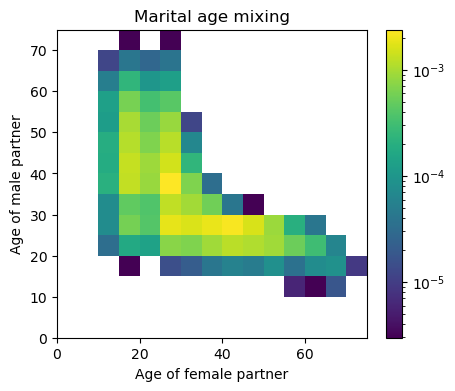

In [4]:
snap = hpv.snapshot(timepoints=['2020'])
sim = hpv.Sim(pars, analyzers=snap)
sim.run()

a = sim.get_analyzer()
people = a.snapshots[0]

# Plot age mixing
import pylab as pl
import matplotlib as mpl
fig, ax = pl.subplots(nrows=1, ncols=1, figsize=(5, 4))

fc = people.contacts['m']['age_f'] # Get the age of female contacts in marital partnership
mc = people.contacts['m']['age_m'] # Get the age of male contacts in marital partnership
h = ax.hist2d(fc, mc, bins=np.linspace(0, 75, 16), density=True, norm=mpl.colors.LogNorm())
ax.set_xlabel('Age of female partner')
ax.set_ylabel('Age of male partner')
fig.colorbar(h[3], ax=ax)
ax.set_title('Marital age mixing')
pl.show();

## Age pyramids

Age pyramids, like snapshots, take a picture of the people at a given point in time, and then bin them into age groups by sex. These can also be plotted alongside data:

Loading location-specific demographic data for "south africa"
Initializing sim with 50000 agents
Loading location-specific data for "south africa"
Dates provided in the age pyramid datafile ({'2010.0', '1990.0', '2000.0', '2020.0'}) are not the same as the age pyramid dates that were requested (['2010.0' '2020.0']).
Plots will only show requested dates, not all dates in the datafile.
  Running 2000.0 ( 0/62) (1.81 s)  ———————————————————— 2%
  Running 2005.0 (10/62) (4.07 s)  •••————————————————— 18%
  Running 2010.0 (20/62) (6.47 s)  ••••••—————————————— 34%
  Running 2015.0 (30/62) (9.03 s)  ••••••••••—————————— 50%
  Running 2020.0 (40/62) (11.58 s)  •••••••••••••——————— 66%
  Running 2025.0 (50/62) (14.00 s)  ••••••••••••••••———— 82%
  Running 2030.0 (60/62) (16.87 s)  •••••••••••••••••••— 98%
Simulation summary:
       83,892 infections
            0 dysplasias
            0 pre-cins
        8,482 cin1s
       12,677 cin2s
        3,542 cin3s
       52,945 cins
        2,237 cance

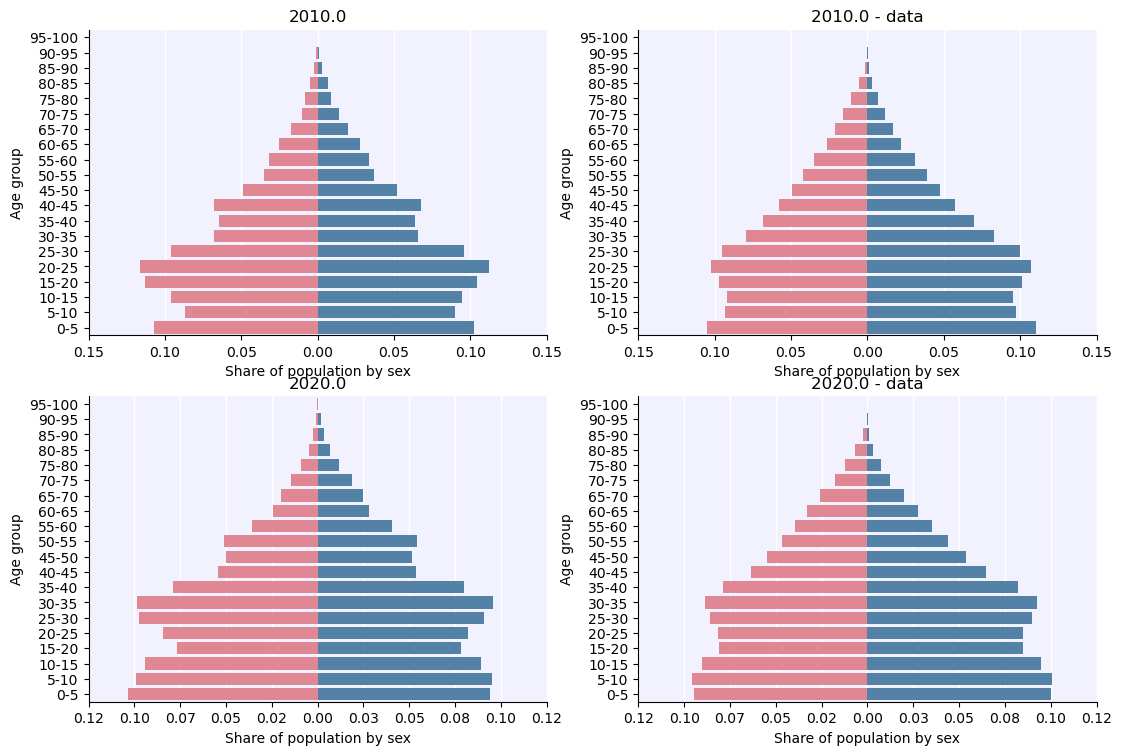

In [3]:
# Create some parameters
pars = dict(n_agents=50e3, start=2000, n_years=30, dt=0.5)

# Make the age pyramid analyzer
age_pyr = hpv.age_pyramid(
    timepoints=['2010', '2020'],
    datafile='south_africa_age_pyramid.csv',
    edges=np.linspace(0, 100, 21))

# Make the sim, run, get the analyzer, and plot
sim = hpv.Sim(pars, location='south africa', analyzers=age_pyr)
sim.run()
a = sim.get_analyzer()
fig = a.plot(percentages=True);